## Reporte de Selección y Parametrización de los Modelos

En el siguiente documento se procedera a 

In [2]:
import os
import pandas as pd
import re

# Especifica la carpeta donde se encuentran los archivos CSV
carpeta = 'GPA-Data-ElectroDunas'

# Lista para almacenar DataFrames individuales de cada archivo CSV
dataframes = []

# Itera sobre los archivos en la carpeta
for archivo in os.listdir(carpeta):
    if archivo.endswith('.csv') and archivo.startswith('DATOSCLIENTE'):
        ruta_archivo = os.path.join(carpeta, archivo)
        
        # Utiliza expresiones regulares para extraer el número del cliente del nombre del archivo
        numero_cliente_match = re.search(r'\d+', archivo)
        if numero_cliente_match:
            numero_cliente = int(numero_cliente_match.group())
        else:
            numero_cliente = None  # Manejar el caso en el que no se encuentra un número
        
        # Lee el archivo CSV y almacena los datos en un DataFrame
        df = pd.read_csv(ruta_archivo)
        
        # Agrega una columna 'Cliente' al DataFrame
        df['Cliente'] = f'Cliente {numero_cliente}'
        
        # Agrega el DataFrame a la lista
        dataframes.append(df)

# Concatena todos los DataFrames en uno solo
df_final = pd.concat(dataframes, ignore_index=True)

# Convierte la columna 'Fecha' a tipo datetime
df_final['Fecha'] = pd.to_datetime(df_final['Fecha'])

# Crea nuevas columnas
df_final['Año'] = df_final['Fecha'].dt.year
df_final['Mes'] = df_final['Fecha'].dt.month
df_final['Trimestre'] = df_final['Fecha'].dt.quarter
df_final['Dia'] = df_final['Fecha'].dt.day
df_final['Hora'] = df_final['Fecha'].dt.hour
df_final['Dia_Semana'] = df_final['Fecha'].dt.day_name()

df_final.head()

,Fecha,Active_energy,Reactive_energy,Voltaje_FA,Voltaje_FC,Cliente,Año,Mes,Trimestre,Dia,Hora,Dia_Semana
0,2021-01-01 00:00:00,0.357841,0.282788,455.139171,510.561002,Cliente 1,2021,1,1,1,0,Friday
1,2021-01-01 01:00:00,0.372264,0.431377,469.978787,469.917178,Cliente 1,2021,1,1,1,1,Friday
2,2021-01-01 02:00:00,1.044687,0.338626,468.721120,546.949147,Cliente 1,2021,1,1,1,2,Friday
3,2021-01-01 03:00:00,0.566425,0.495791,452.329255,444.122989,Cliente 1,2021,1,1,1,3,Friday
4,2021-01-01 04:00:00,1.080556,0.472018,513.477596,535.463719,Cliente 1,2021,1,1,1,4,Friday


In [3]:
## Max, Min, Desvest
max_active_energy = df_final['Active_energy'].max()
min_active_energy = df_final['Active_energy'].min()
std_active_energy = df_final['Active_energy'].std()

print(f'Max Active Energy: {max_active_energy}')
print(f'Min Active Energy: {min_active_energy}')
print(f'Standard Deviation of Active Energy: {std_active_energy}')

Max Active Energy: 14.622644283216186
Min Active Energy: -1.329018447895005
Standard Deviation of Active Energy: 1.7187798079929433


In [4]:
## Picos de Consumo
## Calcular la media y la desviación estándar de 'Active_energy'
media_consumo = df_final['Active_energy'].mean()
desviacion_estandar_consumo = df_final['Active_energy'].std()

## Definir un múltiplo de la desviación estándar como umbral para identificar picos positivos
umbral_picos_positivos = 2  

## Filtrar las filas que superan el umbral para identificar picos de consumo positivos
pico_positivo = df_final[df_final['Active_energy'] > media_consumo + umbral_picos_positivos * desviacion_estandar_consumo]

pico_positivo.shape

(28839, 12)

In [5]:
## Día de la semana con mayor consumo
dia_max_consumo = df_final.loc[df_final['Active_energy'].idxmax(), 'Dia_Semana']
print(f'Día de la semana de mayor consumo: {dia_max_consumo}')

Día de la semana de mayor consumo: Friday


In [6]:
## Mes con mayor consumo
mes_max_consumo = df_final.groupby('Mes')['Active_energy'].sum().idxmax()
print(f'Mes de mayor consumo: {mes_max_consumo}')

Mes de mayor consumo: 3


In [7]:
# Hora y Día de la semana con mayor consumo
hora_dia_max_consumo = df_final.loc[df_final['Active_energy'].idxmax(), ['Hora', 'Dia_Semana']]
print(f'Hora y día de la semana de mayor consumo:')
print(hora_dia_max_consumo)

Hora y día de la semana de mayor consumo:
Hora               1
Dia_Semana    Friday
Name: 374429, dtype: object


In [8]:
## Valores Negativos
valores_negativos = df_final[df_final['Active_energy'] < 0]
valores_negativos

,Fecha,Active_energy,Reactive_energy,Voltaje_FA,Voltaje_FC,Cliente,Año,Mes,Trimestre,Dia,Hora,Dia_Semana
133780,2021-11-09 15:00:00,-0.381904,0.382493,2077.430688,2093.655684,Cliente 17,2021,11,4,9,15,Tuesday
133781,2021-11-09 16:00:00,-0.408740,0.469523,2036.334551,2093.205889,Cliente 17,2021,11,4,9,16,Tuesday
133789,2021-11-10 00:00:00,-0.187803,0.392220,1950.083873,1951.344805,Cliente 17,2021,11,4,10,0,Wednesday
133790,2021-11-10 01:00:00,-0.455174,0.459796,1931.903407,1858.665907,Cliente 17,2021,11,4,10,1,Wednesday
133791,2021-11-10 02:00:00,-0.338941,0.390148,1910.706034,2064.042938,Cliente 17,2021,11,4,10,2,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
216302,2022-05-09 12:00:00,-0.457582,0.200000,2069.593516,2077.851435,Cliente 20,2022,5,2,9,12,Monday
216303,2022-05-09 13:00:00,-0.458964,1.484933,2078.795633,2073.401393,Cliente 20,2022,5,2,9,13,Monday
216304,2022-05-09 14:00:00,-0.427294,0.231000,2071.330458,2079.444732,Cliente 20,2022,5,2,9,14,Monday
216305,2022-05-09 15:00:00,-0.455775,0.200000,2039.538550,2088.843514,Cliente 20,2022,5,2,9,15,Monday


In [9]:
## Completitud

## Total de filas antes de cambios
total_filas_antes = len(df_final)

## Verificar si hay valores nulos
completitud_sin_nulos = df_final['Active_energy'].notnull().all()

## Verificar si hay valores no numéricos
completitud_numerica = pd.to_numeric(df_final['Active_energy'], errors='coerce').notnull().all()

# Imprimir resultados
print(f'Completitud (sin valores nulos): {completitud_sin_nulos}')
print(f'Completitud (sin valores no numéricos): {completitud_numerica}')

Completitud (sin valores nulos): True
Completitud (sin valores no numéricos): True


In [10]:
## Clientes que dejan de reportar
clientes_faltantes = []

# Agrupar por cliente y fecha, contar las observaciones y verificar si hay algún día u hora faltante
for cliente, sub_df in df_final.groupby('Cliente'):
    fechas_esperadas = pd.date_range(sub_df['Fecha'].min(), sub_df['Fecha'].max(), freq='H' if 'Hora' in sub_df.columns else 'D')
    fechas_reales = sub_df['Fecha']
    
    if not fechas_esperadas.equals(fechas_reales):
        clientes_faltantes.append(cliente)

print('Clientes con días u horas faltantes:')
print(clientes_faltantes)
conteo_clientes_faltantes = len(clientes_faltantes)
print(f'Número de clientes con días u horas faltantes: {conteo_clientes_faltantes}')

Clientes con días u horas faltantes:
['Cliente 1', 'Cliente 10', 'Cliente 11', 'Cliente 12', 'Cliente 13', 'Cliente 14', 'Cliente 15', 'Cliente 16', 'Cliente 17', 'Cliente 18', 'Cliente 19', 'Cliente 2', 'Cliente 20', 'Cliente 21', 'Cliente 22', 'Cliente 23', 'Cliente 24', 'Cliente 25', 'Cliente 26', 'Cliente 27', 'Cliente 28', 'Cliente 29', 'Cliente 3', 'Cliente 30', 'Cliente 4', 'Cliente 5', 'Cliente 6', 'Cliente 7', 'Cliente 8', 'Cliente 9']
Número de clientes con días u horas faltantes: 30


In [11]:
## Verificar si todos los días se reportan mediciones
clientes_dias_sin_reporte = []

for cliente, sub_df in df_final.groupby('Cliente'):
    fechas_esperadas_dia = pd.date_range(sub_df['Fecha'].min(), sub_df['Fecha'].max(), freq='D')
    fechas_reales_dia = sub_df['Fecha'].dt.floor('D')
    
    if not fechas_esperadas_dia.equals(fechas_reales_dia):
        clientes_dias_sin_reporte.append(cliente)

print('Clientes con días sin reporte:')
print(clientes_dias_sin_reporte)
conteo_clientes_dias = len(clientes_dias_sin_reporte)
print(f'Número de clientes con días faltantes: {conteo_clientes_dias}')

Clientes con días sin reporte:
['Cliente 1', 'Cliente 10', 'Cliente 11', 'Cliente 12', 'Cliente 13', 'Cliente 14', 'Cliente 15', 'Cliente 16', 'Cliente 17', 'Cliente 18', 'Cliente 19', 'Cliente 2', 'Cliente 20', 'Cliente 21', 'Cliente 22', 'Cliente 23', 'Cliente 24', 'Cliente 25', 'Cliente 26', 'Cliente 27', 'Cliente 28', 'Cliente 29', 'Cliente 3', 'Cliente 30', 'Cliente 4', 'Cliente 5', 'Cliente 6', 'Cliente 7', 'Cliente 8', 'Cliente 9']
Número de clientes con días faltantes: 30


In [12]:
## Verificar si todas las horas se reportan mediciones
clientes_horas_sin_medicion = []

for cliente, sub_df in df_final.groupby('Cliente'):
    fechas_esperadas_hora = pd.date_range(sub_df['Fecha'].min(), sub_df['Fecha'].max(), freq='H')
    fechas_reales_hora = sub_df['Fecha'].dt.floor('H')
    
    if not fechas_esperadas_hora.equals(fechas_reales_hora):
        clientes_horas_sin_medicion.append(cliente)

print('Clientes con horas sin medición:')
print(clientes_horas_sin_medicion)
conteo_clientes_horas = len(clientes_horas_sin_medicion)
print(f'Número de clientes con días faltantes: {conteo_clientes_horas}')

Clientes con horas sin medición:
['Cliente 1', 'Cliente 10', 'Cliente 11', 'Cliente 12', 'Cliente 13', 'Cliente 14', 'Cliente 15', 'Cliente 16', 'Cliente 17', 'Cliente 18', 'Cliente 19', 'Cliente 2', 'Cliente 20', 'Cliente 21', 'Cliente 22', 'Cliente 23', 'Cliente 24', 'Cliente 25', 'Cliente 26', 'Cliente 27', 'Cliente 28', 'Cliente 29', 'Cliente 3', 'Cliente 30', 'Cliente 4', 'Cliente 5', 'Cliente 6', 'Cliente 7', 'Cliente 8', 'Cliente 9']
Número de clientes con días faltantes: 30


In [13]:
import pandas as pd

# Variables de interés
variables_interes = ['Active_energy']

# Función para calcular las estadísticas deseadas
def calcular_estadisticas(variable):
    return pd.Series({
        'Mínimo': df_final[variable].min(),
        'Primer cuartil': df_final[variable].quantile(0.25),
        'Promedio': df_final[variable].mean(),
        'Mediana': df_final[variable].median(),
        'Tercer cuartil': df_final[variable].quantile(0.75),
        'Máximo': df_final[variable].max(),
        'Desviación': df_final[variable].std()
    }, name=variable)

# Crear un DataFrame con las estadísticas para cada variable
tabla_estadisticas = pd.DataFrame([calcular_estadisticas(variable) for variable in variables_interes])

# Imprimir la tabla
tabla_estadisticas

,Mínimo,Primer cuartil,Promedio,Mediana,Tercer cuartil,Máximo,Desviación
Active_energy,-1.329018,0.242788,1.47205,0.810771,1.992488,14.622644,1.71878


In [14]:
tabla_estadisticas.transpose()

,Active_energy
Mínimo,-1.329018
Primer cuartil,0.242788
Promedio,1.472050
Mediana,0.810771
Tercer cuartil,1.992488
Máximo,14.622644
Desviación,1.718780


In [15]:
tabla_estadisticas.columns

Index(['Mínimo', 'Primer cuartil', 'Promedio', 'Mediana', 'Tercer cuartil',
       'Máximo', 'Desviación'],
      dtype='object')

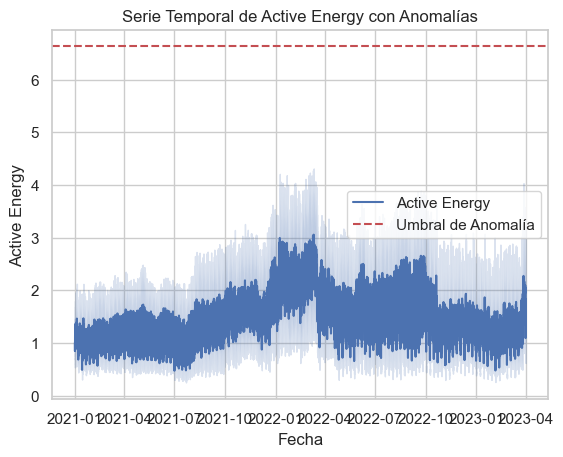

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula el Z-Score para 'Active_energy'
z_scores = (df_final['Active_energy'] - df_final['Active_energy'].mean()) / df_final['Active_energy'].std()

# Establece el umbral para identificar anomalías
umbral_anomalia = 3

# Configura el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Crea el gráfico de la serie temporal con Seaborn
sns.lineplot(x='Fecha', y='Active_energy', data=df_final, label='Active Energy')

# Agrega una línea horizontal para el umbral de anomalía
plt.axhline(df_final['Active_energy'].mean() + umbral_anomalia * df_final['Active_energy'].std(), color='r', linestyle='--', label='Umbral de Anomalía')

# Configura el gráfico
plt.title('Serie Temporal de Active Energy con Anomalías')
plt.xlabel('Fecha')
plt.ylabel('Active Energy')

# Muestra la leyenda
plt.legend()

# Muestra el gráfico
plt.show()

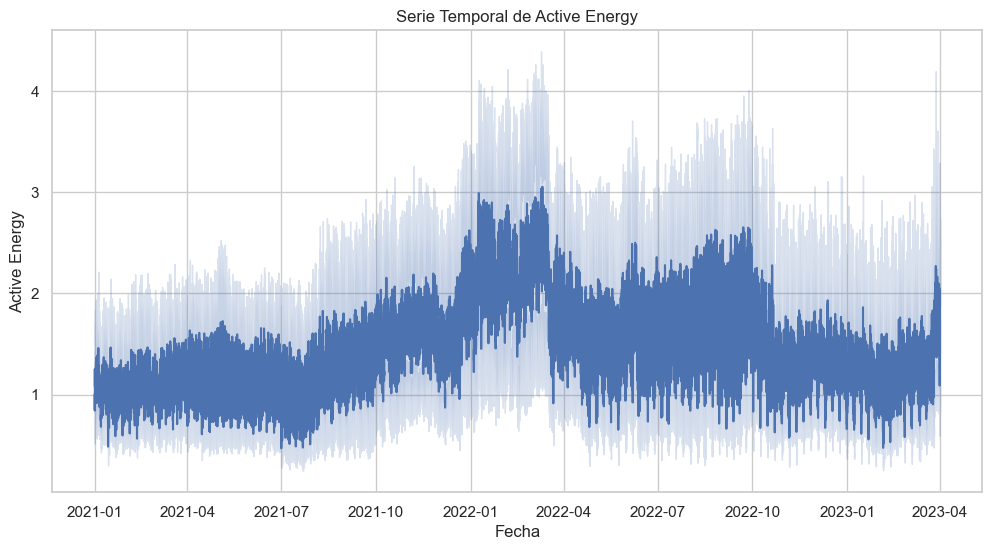

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea la figura y el eje
fig, ax = plt.subplots(figsize=(12, 6))

# Grafica la serie temporal de 'Active_energy'
sns.lineplot(x='Fecha', y='Active_energy', data=df_final, ax=ax)

# Configura el gráfico
ax.set_title('Serie Temporal de Active Energy')
ax.set_xlabel('Fecha')
ax.set_ylabel('Active Energy')

# Muestra el gráfico
plt.show()

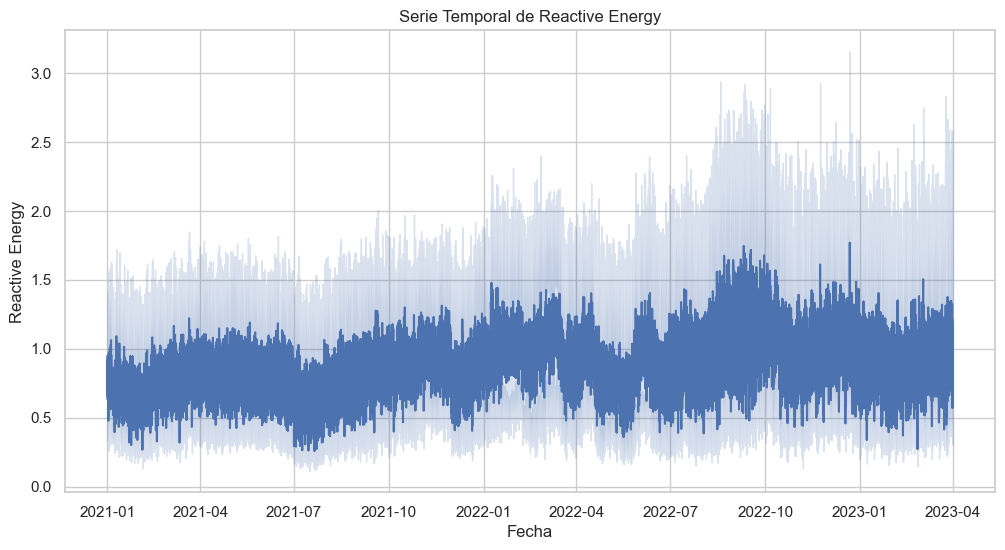

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea la figura y el eje
fig, ax = plt.subplots(figsize=(12, 6))

# Grafica la serie temporal de 'Active_energy'
sns.lineplot(x='Fecha', y='Reactive_energy', data=df_final, ax=ax)

# Configura el gráfico
ax.set_title('Serie Temporal de Reactive Energy')
ax.set_xlabel('Fecha')
ax.set_ylabel('Reactive Energy')

# Muestra el gráfico
plt.show()

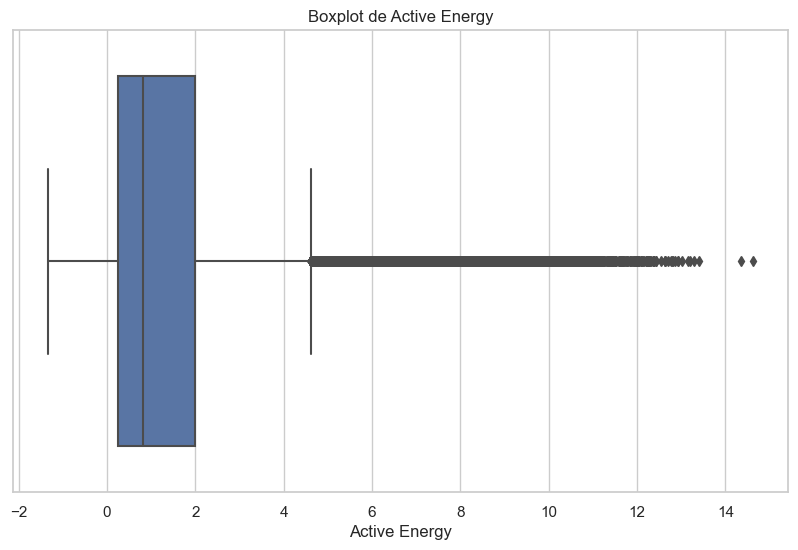

In [19]:
# Supongamos que tienes un DataFrame llamado 'df' con una columna 'Active Energy'
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Crear el boxplot
sns.boxplot(x=df_final['Active_energy'])

# Añadir título y etiquetas
plt.title('Boxplot de Active Energy')
plt.xlabel('Active Energy')

# Mostrar el gráfico
plt.show()

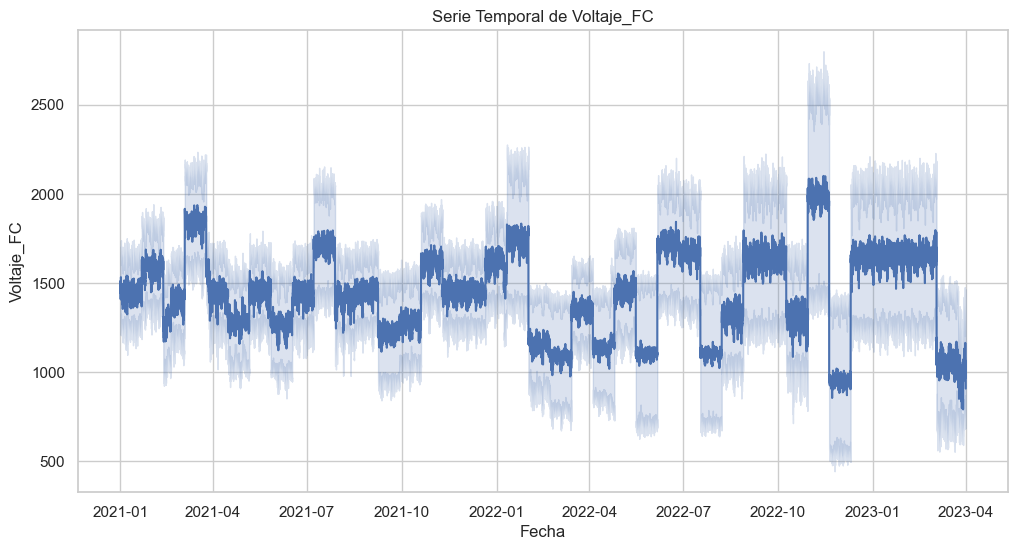

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea la figura y el eje
fig, ax = plt.subplots(figsize=(12, 6))

# Grafica la serie temporal de 'Active_energy'
sns.lineplot(x='Fecha', y='Voltaje_FC', data=df_final, ax=ax)

# Configura el gráfico
ax.set_title('Serie Temporal de Voltaje_FC')
ax.set_xlabel('Fecha')
ax.set_ylabel('Voltaje_FC')

# Muestra el gráfico
plt.show()

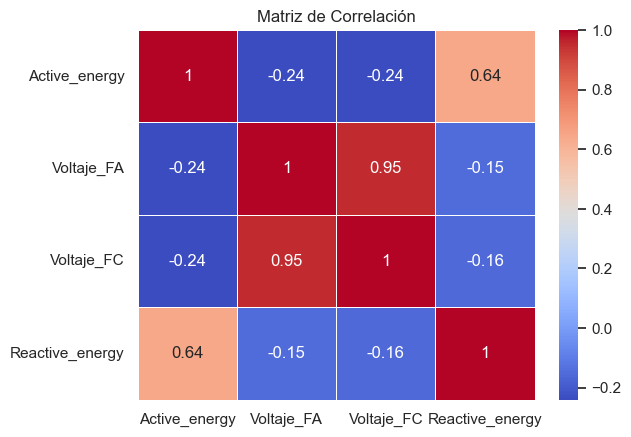

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables de interés
variables_interes = ['Active_energy', 'Voltaje_FA', 'Voltaje_FC', 'Reactive_energy']

# Calcula la matriz de correlación
matriz_correlacion = df_final[variables_interes].corr()

# Configura el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Crea el mapa de calor de la matriz de correlación
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', linewidths=.5)

# Configura el título
plt.title('Matriz de Correlación')

# Muestra el gráfico
plt.show()

In [22]:
# Código para verificar la completitud
clientes_por_ano = df_final.groupby('Año')['Cliente'].nunique()
print(clientes_por_ano)

Año
2021    30
2022    30
2023    15
Name: Cliente, dtype: int64


In [23]:
# Código para verificar el formato
formato_correcto = all([pd.api.types.is_datetime64_any_dtype(df_final['Fecha']),
                       pd.api.types.is_numeric_dtype(df_final['Active_energy']),
                       pd.api.types.is_numeric_dtype(df_final['Reactive_energy']),
                       pd.api.types.is_numeric_dtype(df_final['Voltaje_FA']),
                       pd.api.types.is_numeric_dtype(df_final['Voltaje_FC'])])
print(f'Formato correcto: {formato_correcto}')

Formato correcto: True


In [24]:
# Código para verificar la consistencia de energía reactiva vs. activa por cliente
consistencia_energia = df_final.groupby('Cliente').apply(lambda x: (x['Reactive_energy'] <= x['Active_energy']).all()).all()
print(f'Consistencia de energía reactiva vs. activa por cliente: {consistencia_energia}')

Consistencia de energía reactiva vs. activa por cliente: False


In [25]:
consistencia_energia_detalles = df_final.groupby('Cliente').apply(lambda x: (x['Reactive_energy'] <= x['Active_energy']).all()).reset_index(name='ConsistenciaEnergia')
# Convertir los nombres de los clientes a valores numéricos antes de ordenar
consistencia_energia_detalles['Cliente'] = consistencia_energia_detalles['Cliente'].str.extract('(\d+)').astype(int)

# Ordenar la tabla por cliente
consistencia_energia_detalles = consistencia_energia_detalles.sort_values(by='Cliente')

# Imprimir la tabla ordenada
print(consistencia_energia_detalles)
consistencia_energia_detalles

    Cliente  ConsistenciaEnergia
0         1                False
11        2                False
22        3                False
24        4                False
25        5                False
26        6                False
27        7                False
28        8                False
29        9                False
1        10                False
2        11                False
3        12                False
4        13                False
5        14                False
6        15                False
7        16                False
8        17                False
9        18                False
10       19                False
12       20                False
13       21                False
14       22                False
15       23                False
16       24                False
17       25                False
18       26                False
19       27                False
20       28                False
21       29                False
23       3

,Cliente,ConsistenciaEnergia
0,1,False
11,2,False
22,3,False
24,4,False
25,5,False
26,6,False
27,7,False
28,8,False
29,9,False
1,10,False


In [26]:
print(consistencia_energia_detalles.to_string(index=False))

 Cliente  ConsistenciaEnergia
       1                False
       2                False
       3                False
       4                False
       5                False
       6                False
       7                False
       8                False
       9                False
      10                False
      11                False
      12                False
      13                False
      14                False
      15                False
      16                False
      17                False
      18                False
      19                False
      20                False
      21                False
      22                False
      23                False
      24                False
      25                False
      26                False
      27                False
      28                False
      29                False
      30                False


In [27]:
# Código para obtener el número de registros que no cumplen la regla
registros_incumplen_regla = df_final[df_final['Reactive_energy'] > df_final['Active_energy']].shape[0]
registros_cumplen_regla = df_final.shape[0] - registros_incumplen_regla
print(f'Registros que cumplen la regla: {registros_cumplen_regla}')
print(f'Registros que no cumplen la regla: {registros_incumplen_regla}')

Registros que cumplen la regla: 343339
Registros que no cumplen la regla: 120086


In [28]:
# Conteo total de valores negativos en la columna Voltaje_FA
conteo_total_negativos_voltaje_fa = df_final[df_final['Voltaje_FA'] < 0]['Voltaje_FA'].count()
print("Cantidad total de valores negativos en la columna Voltaje_FA:", conteo_total_negativos_voltaje_fa)

# Conteo total de valores negativos en la columna Voltaje_FC
conteo_total_negativos_voltaje_fc = df_final[df_final['Voltaje_FC'] < 0]['Voltaje_FC'].count()
print("Cantidad total de valores negativos en la columna Voltaje_FC:", conteo_total_negativos_voltaje_fc)

# Conteo total de valores negativos en la columna Active_energy
conteo_total_negativos_energia = df_final[df_final['Active_energy'] < 0]['Active_energy'].count()
print("Cantidad total de valores negativos en la columna Active_energy:", conteo_total_negativos_energia)

# Conteo total de valores negativos en la columna Reactive_energy
conteo_total_negativos_energia_reactiva = df_final[df_final['Reactive_energy'] < 0]['Reactive_energy'].count()
print("Cantidad total de valores negativos en la columna Reactive_energy:", conteo_total_negativos_energia_reactiva)

Cantidad total de valores negativos en la columna Voltaje_FA: 0
Cantidad total de valores negativos en la columna Voltaje_FC: 0
Cantidad total de valores negativos en la columna Active_energy: 505
Cantidad total de valores negativos en la columna Reactive_energy: 0


In [29]:
df_final

,Fecha,Active_energy,Reactive_energy,Voltaje_FA,Voltaje_FC,Cliente,Año,Mes,Trimestre,Dia,Hora,Dia_Semana
0,2021-01-01 00:00:00,0.357841,0.282788,455.139171,510.561002,Cliente 1,2021,1,1,1,0,Friday
1,2021-01-01 01:00:00,0.372264,0.431377,469.978787,469.917178,Cliente 1,2021,1,1,1,1,Friday
2,2021-01-01 02:00:00,1.044687,0.338626,468.721120,546.949147,Cliente 1,2021,1,1,1,2,Friday
3,2021-01-01 03:00:00,0.566425,0.495791,452.329255,444.122989,Cliente 1,2021,1,1,1,3,Friday
4,2021-01-01 04:00:00,1.080556,0.472018,513.477596,535.463719,Cliente 1,2021,1,1,1,4,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...
463420,2023-03-31 20:00:00,0.231000,0.309493,1343.358528,1288.567372,Cliente 9,2023,3,1,31,20,Friday
463421,2023-03-31 21:00:00,0.041937,0.314091,1050.653622,1266.553989,Cliente 9,2023,3,1,31,21,Friday
463422,2023-03-31 22:00:00,0.231000,0.266937,1104.985834,991.259378,Cliente 9,2023,3,1,31,22,Friday
463423,2023-03-31 23:00:00,0.150296,0.312547,1284.048639,1091.283710,Cliente 9,2023,3,1,31,23,Friday


In [30]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

# Eliminar valores negativos en Active_energy
df = df_final[df_final['Active_energy'] >= 0]

# Transformar Mes, Trimestre, Día y Día_Semana en variables categóricas
categorical_columns = ['Cliente', 'Mes', 'Trimestre', 'Dia', 'Dia_Semana']
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Seleccionar características para entrenar el modelo
features = ['Cliente', 'Mes', 'Trimestre', 'Dia', 'Dia_Semana', 'Active_energy']

# Escalar características si es necesario (no es necesario para Isolation Forest)

# Entrenar el modelo Isolation Forest
isolation_forest = IsolationForest(contamination=0.01)  # 1% de datos se asume como anomalías
isolation_forest.fit(df[features])

# Predecir outliers (anomalías)
outliers = isolation_forest.predict(df[features])

# Añadir una columna al DataFrame original indicando si cada punto de datos es un outlier o no
df['is_outlier'] = outliers


C:\Users\Felipe\AppData\Local\Temp\ipykernel_32624\4054630540.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoders[column].fit_transform(df[column])
C:\Users\Felipe\AppData\Local\Temp\ipykernel_32624\4054630540.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoders[column].fit_transform(df[column])
C:\Users\Felipe\AppData\Local\Temp\ipykernel_32624\4054630540.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [31]:
df

,Fecha,Active_energy,Reactive_energy,Voltaje_FA,Voltaje_FC,Cliente,Año,Mes,Trimestre,Dia,Hora,Dia_Semana,is_outlier
0,2021-01-01 00:00:00,0.357841,0.282788,455.139171,510.561002,0,2021,0,0,0,0,0,1
1,2021-01-01 01:00:00,0.372264,0.431377,469.978787,469.917178,0,2021,0,0,0,1,0,1
2,2021-01-01 02:00:00,1.044687,0.338626,468.721120,546.949147,0,2021,0,0,0,2,0,1
3,2021-01-01 03:00:00,0.566425,0.495791,452.329255,444.122989,0,2021,0,0,0,3,0,1
4,2021-01-01 04:00:00,1.080556,0.472018,513.477596,535.463719,0,2021,0,0,0,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
463420,2023-03-31 20:00:00,0.231000,0.309493,1343.358528,1288.567372,29,2023,2,0,30,20,0,1
463421,2023-03-31 21:00:00,0.041937,0.314091,1050.653622,1266.553989,29,2023,2,0,30,21,0,1
463422,2023-03-31 22:00:00,0.231000,0.266937,1104.985834,991.259378,29,2023,2,0,30,22,0,1
463423,2023-03-31 23:00:00,0.150296,0.312547,1284.048639,1091.283710,29,2023,2,0,30,23,0,1


In [32]:
# Analizar los outliers
outliers = df[df['is_outlier'] == -1]  # -1 indica un outlier según Isolation Forest

 1    458290
-1      4630
Name: is_outlier, dtype: int64


<AxesSubplot:>

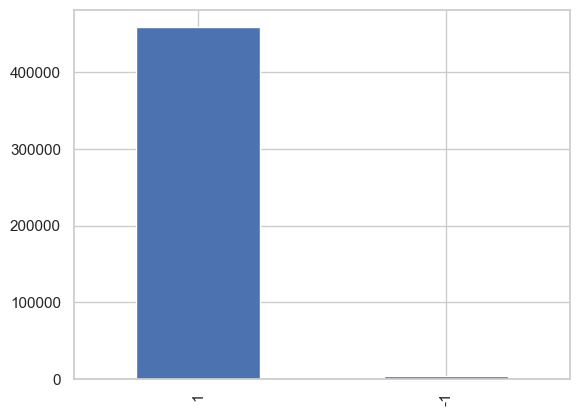

In [33]:
outlier_index = list(outliers.index)

#datapoints classified -1 are anomalous
print(df['is_outlier'].value_counts())
df['is_outlier'].value_counts().plot(kind = 'bar')

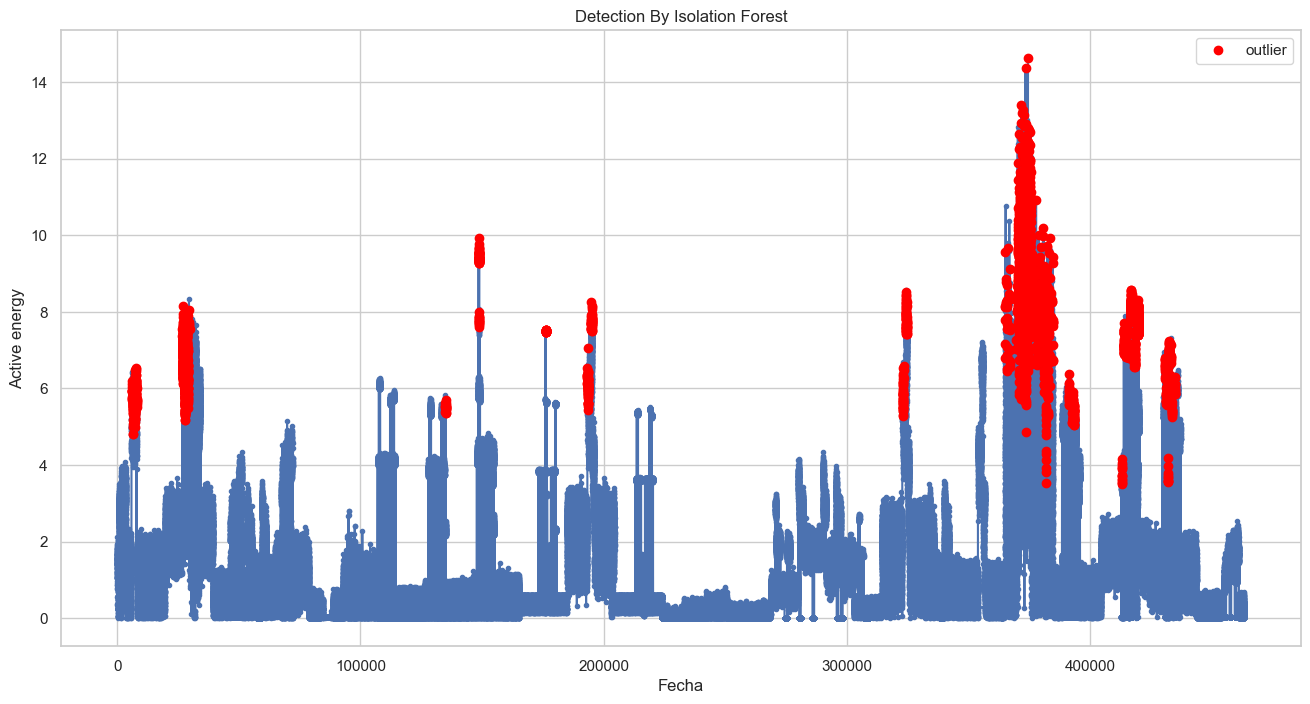

In [34]:
plt.figure(figsize = (16, 8))

plt.plot(df['Active_energy'], marker = '.')
plt.plot(outliers['Active_energy'], 'o', color = 'red', label = 'outlier')
plt.title('Detection By Isolation Forest')

#plt.grid()
plt.xlabel('Fecha')
plt.ylabel('Active energy')
plt.legend()

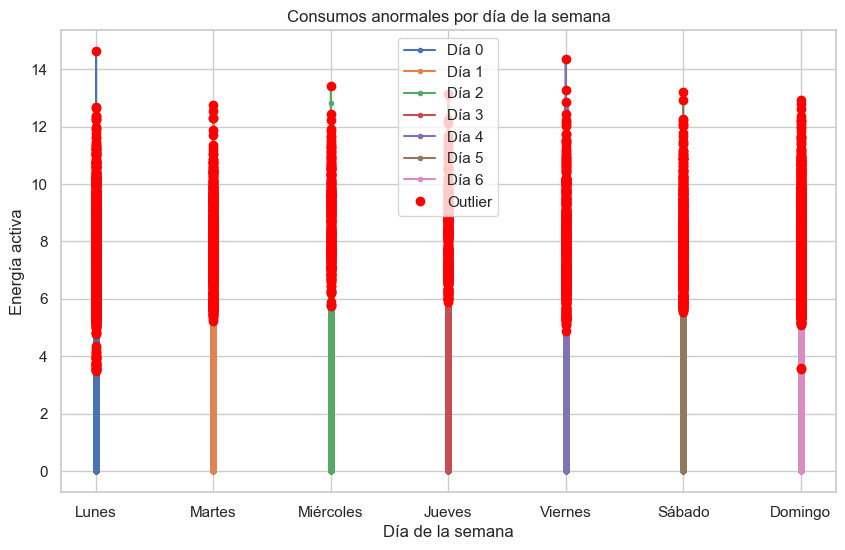

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Crear un diccionario para mapear los números de día de la semana a nombres de día
day_map = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miércoles',
    3: 'Jueves',
    4: 'Viernes',
    5: 'Sábado',
    6: 'Domingo'
}

# Iterar sobre cada día de la semana
for day in range(7):
    # Filtrar los datos para el día de la semana actual
    day_df = df[df['Dia_Semana'] == day]
    # Graficar los consumos de energía activa para ese día
    plt.plot(day_df['Dia_Semana'].apply(lambda x: day_map[x]), day_df['Active_energy'], marker='.', label=f'Día {day}')

# Resaltar los outliers
outliers_df = df[df['is_outlier'] == -1]
plt.plot(outliers_df['Dia_Semana'].apply(lambda x: day_map[x]), outliers_df['Active_energy'], 'o', color='red', label='Outlier')

plt.title('Consumos anormales por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Energía activa')
plt.legend()
plt.show()

In [36]:
df

,Fecha,Active_energy,Reactive_energy,Voltaje_FA,Voltaje_FC,Cliente,Año,Mes,Trimestre,Dia,Hora,Dia_Semana,is_outlier
0,2021-01-01 00:00:00,0.357841,0.282788,455.139171,510.561002,0,2021,0,0,0,0,0,1
1,2021-01-01 01:00:00,0.372264,0.431377,469.978787,469.917178,0,2021,0,0,0,1,0,1
2,2021-01-01 02:00:00,1.044687,0.338626,468.721120,546.949147,0,2021,0,0,0,2,0,1
3,2021-01-01 03:00:00,0.566425,0.495791,452.329255,444.122989,0,2021,0,0,0,3,0,1
4,2021-01-01 04:00:00,1.080556,0.472018,513.477596,535.463719,0,2021,0,0,0,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
463420,2023-03-31 20:00:00,0.231000,0.309493,1343.358528,1288.567372,29,2023,2,0,30,20,0,1
463421,2023-03-31 21:00:00,0.041937,0.314091,1050.653622,1266.553989,29,2023,2,0,30,21,0,1
463422,2023-03-31 22:00:00,0.231000,0.266937,1104.985834,991.259378,29,2023,2,0,30,22,0,1
463423,2023-03-31 23:00:00,0.150296,0.312547,1284.048639,1091.283710,29,2023,2,0,30,23,0,1


## Modelo K-Means

In [79]:
# Libreiras necesarias
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [72]:
features= ['Mes', 'Active_energy']

In [73]:
## Se define X
df_cluster= df[features]
df_cluster

,Mes,Active_energy
0,0,0.357841
1,0,0.372264
2,0,1.044687
3,0,0.566425
4,0,1.080556
...,...,...
463420,2,0.231000
463421,2,0.041937
463422,2,0.231000
463423,2,0.150296


In [74]:
## Se definen el número de clusters que en este caso es equivalente al número de clientes
n_clusters = 30

In [75]:
kmeans_30 = KMeans(n_clusters = 30, random_state = 123, n_init=10)
kmeans_30.fit(df_cluster)

KMeans(n_clusters=30, n_init=10, random_state=123)

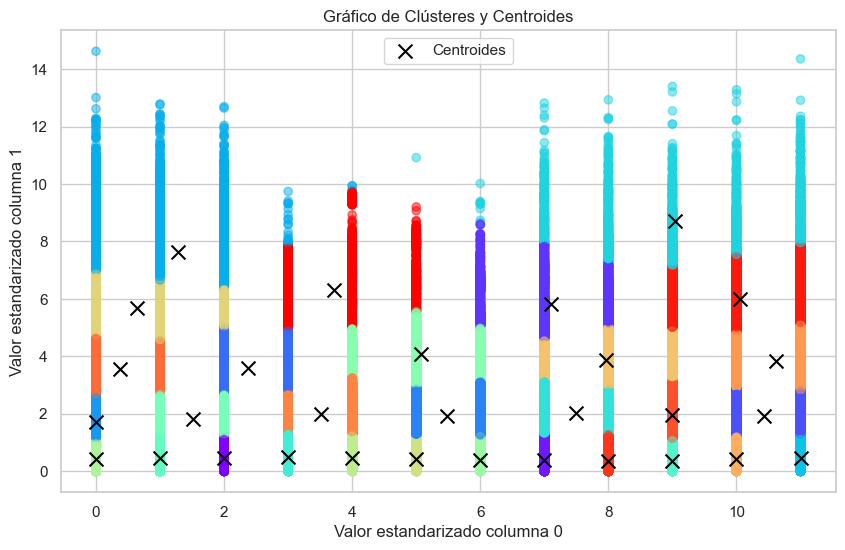

In [76]:
# Obtener las etiquetas de los clústeres y los centroides
cluster_labels = kmeans_30.labels_
cluster_centers = kmeans_30.cluster_centers_

# Graficar los centroides de los clústeres
plt.figure(figsize=(10, 6))
plt.scatter(df_cluster.iloc[:, 0], df_cluster.iloc[:, 1], c=cluster_labels, cmap='rainbow', alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', s=100, label='Centroides')
plt.title('Gráfico de Clústeres y Centroides')
plt.xlabel('Valor estandarizado columna 0')
plt.ylabel('Valor estandarizado columna 1')
plt.legend()
plt.show()

In [77]:
# Encontrar los clusteres centrales
cluster_centers = kmeans_30.cluster_centers_

In [78]:
# Calcular la distancia de cada punto al cluster central
distances = [np.linalg.norm(x - cluster_centers[cluster]) for x, cluster in zip(df_cluster, cluster_labels)]

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U3'), dtype('float64')) -> None

In [80]:
X = df_cluster['Active_energy'].values.reshape(-1, 1)  # Convertirlo a una matriz de una sola columna

# Paso 2: Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Paso 3: Aplicar K-means
k = 4  # Número de clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Obtener las etiquetas de los clusters y los centros de los clusters
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Calcular la distancia de cada punto al centro del cluster asignado
distances = [np.linalg.norm(x - cluster_centers[cluster]) for x, cluster in zip(X_scaled, cluster_labels)]

# Paso 4: Identificar valores anómalos
# Definir un umbral para determinar qué puntos se consideran anómalos
threshold = np.percentile(distances, 95)  # Por ejemplo, tomar el percentil 95 de las distancias
anomalies_indices = np.where(distances > threshold)[0]

# Obtener los valores anómalos y sus índices
anomalies_values = X[anomalies_indices]
anomalies_indices = df_cluster.index[anomalies_indices]

# Mostrar los valores anómalos y sus índices
print("Valores anómalos:")
print(anomalies_values)
print("Índices de los valores anómalos:")
print(anomalies_indices)

c:\Users\Felipe\anaconda3\envs\Financiero\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Valores anómalos:
[[2.82325817]
 [2.76044441]
 [2.93027716]
 ...
 [4.96958705]
 [4.89308879]
 [4.93985091]]
Índices de los valores anómalos:
Int64Index([   579,    580,    581,    583,    591,    592,    594,    595,
               597,    598,
            ...
            437121, 437127, 437144, 437148, 437149, 437154, 437169, 437173,
            437192, 437194],
           dtype='int64', length=23146)


In [81]:
# Crear una nueva columna 'anomalias' en el DataFrame y asignar valores predeterminados de 0
df_cluster['anomalias'] = 0

# Marcar las filas correspondientes a los valores anómalos con el valor de 1 en la columna 'anomalias'
df_cluster.loc[anomalies_indices, 'anomalias'] = 1

# Mostrar el DataFrame con la columna 'anomalias' actualizada
df_cluster

C:\Users\Felipe\AppData\Local\Temp\ipykernel_32624\3759232723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['anomalias'] = 0


,Mes,Active_energy,anomalias
0,0,0.357841,0
1,0,0.372264,0
2,0,1.044687,0
3,0,0.566425,0
4,0,1.080556,0
...,...,...,...
463420,2,0.231000,0
463421,2,0.041937,0
463422,2,0.231000,0
463423,2,0.150296,0


In [82]:
# Contar el total de anomalías en la columna 'anomalias'
total_anomalias = df_cluster['anomalias'].value_counts()

# Mostrar el resultado
print("Total de anomalías en la columna 'anomalias':")
print(total_anomalias)

Total de anomalías en la columna 'anomalias':
0    439774
1     23146
Name: anomalias, dtype: int64


## Modelo OCSVM

In [83]:
import numpy as np
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler



# Paso 3: Entrenar el modelo OCSVM
ocsvm = OneClassSVM(nu=0.05)  # Utiliza un valor de nu adecuado según tus datos
ocsvm.fit(X_scaled)

# Identificar anomalías
anomaly_mask = ocsvm.predict(X_scaled) == -1  # -1 indica anomalía
df_cluster['anomalias_ocsvm'] = anomaly_mask.astype(int)

# Contar el total de anomalías en la columna 'anomalias_ocsvm'
total_anomalias_ocsvm = df_cluster['anomalias_ocsvm'].sum()

# Mostrar el total de anomalías
print("Total de anomalías detectadas por OCSVM:", total_anomalias_ocsvm)

Total de anomalías detectadas por OCSVM: 32610


C:\Users\Felipe\AppData\Local\Temp\ipykernel_32624\566780090.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['anomalias_ocsvm'] = anomaly_mask.astype(int)
